In [1]:
import expt
import matplotlib.pyplot as plt

In [4]:
df = expt.scan("/dfs/scratch1/ranjanr/runs/cs336/2024-04-26/")
df

  0%|          | 0/252 [00:00<?, ?it/s]

,runs_dir,dev,backend,device,num_elements,warmup_steps,rank,world_size,done,time (s)
timestamp,,,,,,,,,,
1714168374688623092,runs/2024-04-26,0,gloo,cpu,128000,5,1,2,True,NaN
1714168374718205723,runs/2024-04-26,0,gloo,cpu,128000,5,0,2,True,0.001288
1714168382653196087,runs/2024-04-26,0,gloo,cpu,128000,5,2,4,True,NaN
1714168382673624150,runs/2024-04-26,0,gloo,cpu,128000,5,0,4,True,0.003326
1714168382673633341,runs/2024-04-26,0,gloo,cpu,128000,5,1,4,True,NaN
...,...,...,...,...,...,...,...,...,...,...
1714169249764028871,runs/2024-04-26,0,nccl,cuda,250000000,5,2,6,True,NaN
1714169249772450899,runs/2024-04-26,0,nccl,cuda,250000000,5,5,6,True,NaN
1714169249871307289,runs/2024-04-26,0,nccl,cuda,250000000,5,0,6,True,0.000185


saved at fig/dist_comm_multi_node.pdf


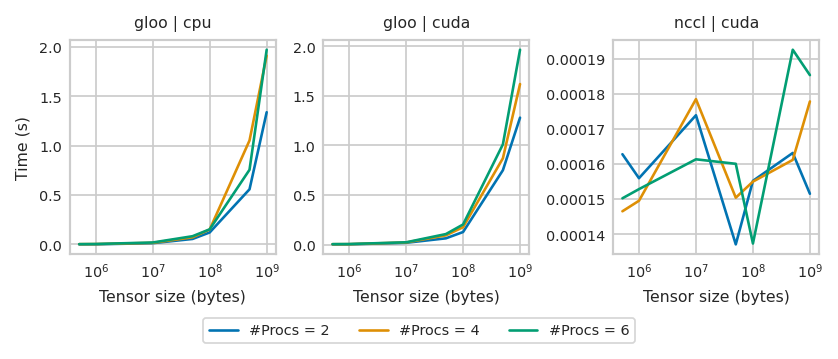

In [6]:
fig, axs = plt.subplots(
    1,
    3,
    figsize=(0.95 * expt.LINE, 0.35 * expt.LINE),
    sharex=True,
    sharey=False,
    layout="constrained",
)
for backend, device, ax in [
    ("gloo", "cpu", axs[0]),
    ("gloo", "cuda", axs[1]),
    ("nccl", "cuda", axs[2]),
]:
    for world_size in [
        2,
        4,
        6,
    ]:
        qdf = df.query(
            f"backend == '{backend}' and device == '{device}' and world_size == {world_size} and rank == 0"
        )
        x = qdf["num_elements"] * 4
        y = qdf["time (s)"]
        ax.plot(x, y, label=f"#Procs = {world_size}" if backend == "nccl" else None)
        ax.set_xscale("log")
        # ax.set_yscale("log")
        ax.set_xlabel("Tensor size (bytes)")
        ax.set_title(f"{backend} | {device}")
        fig.show()
axs[0].set_ylabel("Time (s)")
fig.legend(ncols=3, loc="upper center", bbox_to_anchor=(0.5, 0))
expt.save_fig(fig, "dist_comm_multi_node")